# Dependencies etc

In [1]:
!pip install simpletransformers
!pip install sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 121.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 20.0 MB/s eta 0:00:00
 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Wgrywanie plików do dataframe

In [3]:
from pathlib import Path
import pandas as pd

df = None
directory = '/content/drive/MyDrive/nowe/inzynieria lingwistyczna/PoliTweets'

files = Path(directory).glob('*')
for file in files:
  if df is None:
    df = pd.read_csv(file)
  else:
    df = pd.concat([df, pd.read_csv(file)], axis=0)

In [4]:
df.head()

,Unnamed: 0,tweet_id,user_id,party,topics,text,lemmatized_text,lemmatized_text_only_common
0,0.0,1373578796843032581,2829560096,Lewica,Aborcja,@SznuruS @KrutulPawel @__Lewica @wiosnabiedron...,NaN,NaN
1,1.0,1387708247067463681,2829560096,Lewica,Aborcja,@strajkkobiet @rkonsultacyjna I to proponowało...,NaN,NaN
2,2.0,1389906268362612740,2829560096,Lewica,Aborcja,#Lewica #StrajkKobiet teraz tak wygląda femin...,NaN,NaN
3,3.0,1387378266118492163,2829560096,Lewica,Aborcja,@wredny07 @PolsatNewsPL @strajkkobiet @AM_Zuko...,NaN,NaN
4,4.0,1365637275644801025,2829560096,Lewica,LexTVN,@jarton87 @janmajta @j_przybysz0 @bbudka Ale t...,NaN,NaN


In [5]:
print(f'Ilość tweetów to {len(df)}')

Ilość tweetów to 141855


<Axes: >

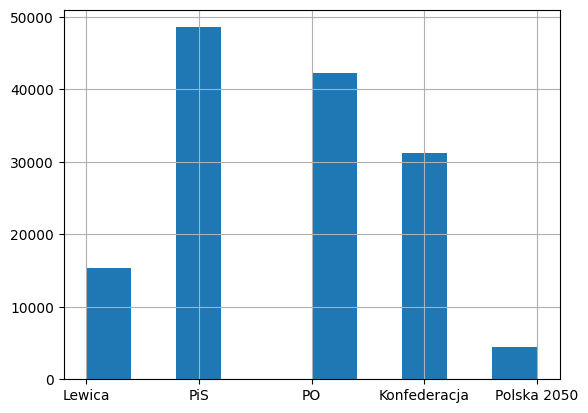

In [6]:
df['party'].hist()

In [7]:
df['party'].value_counts()

PiS             48560
PO              42227
Konfederacja    31261
Lewica          15389
Polska 2050      4418
Name: party, dtype: int64

In [8]:
po_tweets = df.loc[df['party'] == 'PO']
print(len(po_tweets))

42227


### Najbardziej aktywni użytkownicy

In [9]:
po_tweets['user_id'].value_counts()[:20]

917441213690675200     683
1307626595033714688    416
3307901823             366
819218415634313216     320
1282733529609232384    318
2907674452             316
1318145383986565127    288
54274904               276
873854439538511872     272
1065153478459355136    266
4587908235             262
1271401282394259459    262
1241413861477097478    262
856568385882161152     250
901431354633711617     246
861151070              240
906850310307696641     240
1064094402719752192    234
1351641647529000960    234
1606694744             124
Name: user_id, dtype: int64

In [10]:
list(dict(po_tweets['user_id'].value_counts()[:20]).keys())

[917441213690675200,
 1307626595033714688,
 3307901823,
 819218415634313216,
 1282733529609232384,
 2907674452,
 1318145383986565127,
 54274904,
 873854439538511872,
 1065153478459355136,
 4587908235,
 1271401282394259459,
 1241413861477097478,
 856568385882161152,
 901431354633711617,
 861151070,
 906850310307696641,
 1064094402719752192,
 1351641647529000960,
 1606694744]

Teraz możemy stworzyć listę 20 najbardziej aktywnych (w liczbie tweetów) użytkowników danej partii:

In [11]:
all_parties = list(df['party'].unique())
list_of_top_user = list()

for party in all_parties:
  party_tweets = df.loc[df['party'] == party]
  list_of_top_user.extend(list(dict(party_tweets['user_id'].value_counts()[:20]).keys()))

In [12]:
len(list_of_top_user)

100

### Stworzenie datasetu:

In [13]:
data_df = df.loc[df['user_id'].isin(list_of_top_user)]
data_df.head(4)


,Unnamed: 0,tweet_id,user_id,party,topics,text,lemmatized_text,lemmatized_text_only_common
45,45.0,1447511258069098500,1070585732627075073,PiS,TSUE|UE|TK,NaN,NaN,NaN
46,46.0,1466522272487849988,1070585732627075073,PiS,TSUE|UE|TK,NaN,NaN,NaN
47,47.0,1369373248882892801,1070585732627075073,PiS,LexTVN,NaN,NaN,NaN
48,48.0,1446592865757433857,1070585732627075073,PiS,TSUE|UE|TK,NaN,NaN,NaN


In [14]:

# shuffle
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df = data_df.dropna(subset=['text'])

<Axes: >

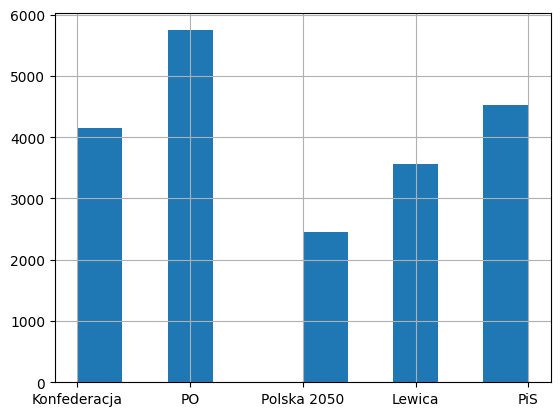

In [15]:
data_df['party'].hist()

In [16]:
data_df.head(10)

,Unnamed: 0,tweet_id,user_id,party,topics,text,lemmatized_text,lemmatized_text_only_common
1,NaN,1447355121906688003,1221969871371677701,Konfederacja,LexTVN,ogląda tvn dostała demencji,oglądać tvn dostać demencja,oglądać tvn dostać
2,27.0,1434537075068575750,3307901823,PO,LexTVN,"@kuba_w @PiotrPzk Oczywiście, TVN ma linię lib...",NaN,NaN
3,NaN,1412057471733190660,1282733529609232384,PO,Aborcja:TSUE|UE|TK,czym poznać pożar burdelu władzy wierchuszka p...,czym poznać pożar burdel władza wierchuszka po...,czym poznać burdel władza wierchuszka politruk...
4,NaN,1446819796163641347,29960736,Polska 2050,TSUE|UE|TK,uniatomy pjk mówi dopłaty pewnych gospodaratw ...,uniatomy pjk mówić dopłata pewnych gospodaratw...,uniatomy pjk mówić dopłata pewnych wielki mówi...
5,NaN,1362649923959857152,1085283059283476480,Lewica,TSUE|UE|TK,sikorskim znają ław rządowych kaczyńskiego 200...,sikorskim znać ława rządowy kaczyńskiego 20050...,znać ława rządowy kaczyńskiego pewnie dobry gł...
6,NaN,1424672253632040961,876020799022530560,Konfederacja,Polski Ład,polskiład dba emerytów pracowników przedsiębio...,polskiład dbać emeryt pracownik przedsiębiorca...,polskiład dbać emeryt pracownik przedsiębiorca...
7,21.0,1361228531389366280,4587908235,PO,Aborcja,"Konserwatyści w @Platforma_org, to pokaz takie...",NaN,NaN
8,7.0,1471441272955092992,2907674452,PO,TSUE|UE|TK,"Prezes TSUE ostrzega, że awantura z Polską i W...",NaN,NaN
9,NaN,1462688927429677059,2420240818,PiS,TSUE|UE|TK,trzyma ue polexit,trzymać ue polexit,trzymać polexit
10,NaN,1357330139500191745,1680277886,PiS,Aborcja,pańcia gajewska kramka szefową ideolo fundacji...,pańcia gajewska kramek szefowa ideolo fundacja...,fundacja aborcja wiadomo zwiększać liczba naro...


Create train, eval and test dataframes 8:1:1

In [17]:
data_df = data_df[['text', 'party']]
data_df.head(10)
len(data_df)

20440

In [18]:
data_df['text'] = data_df['text'].str.replace(r'@\w+', ' ')  # Usuwanie @username
data_df['text'] = data_df['text'].str.replace(r'http\S+', ' ')  # Usuwanie linków http://...
data_df['text'] = data_df['text'].str.replace(r'https\S+', ' ')  # Usuwanie linków https://...
# Zmiana wszystkich znaków na małe litery
data_df['text'] = data_df['text'].str.lower()
# Usuwanie hasztagów
data_df['text'] = data_df['text'].str.replace(r'#\w+', ' ')


data_df.head(10)



<ipython-input-18-830cb7755410>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['text'] = data_df['text'].str.replace(r'@\w+', ' ')  # Usuwanie @username
<ipython-input-18-830cb7755410>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['text'] = data_df['text'].str.replace(r'http\S+', ' ')  # Usuwanie linków http://...
<ipython-input-18-830cb7755410>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['text'] = data_df['text'].str.replace(r'https\S+', ' ')  # Usuwanie linków https://...
<ipython-input-18-830cb7755410>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['text'] = data_df['text'].str.replace(r'#\w+', ' ')


,text,party
1,ogląda tvn dostała demencji,Konfederacja
2,"oczywiście, tvn ma linię liberalną, ale ni...",PO
3,czym poznać pożar burdelu władzy wierchuszka p...,PO
4,uniatomy pjk mówi dopłaty pewnych gospodaratw ...,Polska 2050
5,sikorskim znają ław rządowych kaczyńskiego 200...,Lewica
6,polskiład dba emerytów pracowników przedsiębio...,Konfederacja
7,"konserwatyści w , to pokaz takiej starej poli...",PO
8,"prezes tsue ostrzega, że awantura z polską i w...",PO
9,trzyma ue polexit,PiS
10,pańcia gajewska kramka szefową ideolo fundacji...,PiS


In [19]:
train_df = data_df.sample(frac = 0.8, random_state = 200)
df = data_df.drop(train_df.index)
eval_df = df.sample(frac = 0.5, random_state = 200)
test_df = df.drop(eval_df.index)

train_df.reset_index(drop=True)
eval_df.reset_index(drop=True)
test_df.reset_index(drop=True)

,text,party
0,polskiład dba emerytów pracowników przedsiębio...,Konfederacja
1,ale to twarde głowy tsue przekombinowały.,PiS
2,"każdemu, który bredzi, żeby nie straszyć , ka...",PO
3,2137 jebać pały trybunał,Lewica
4,"nie uwierzysz, ale nawet debile i propagandy...",Polska 2050
...,...,...
2039,taka uwaga w tvn mogłaby pokazać jaki to...,PiS
2040,kobiet prawa - wspólna sprawa! tak było dzisia...,Lewica
2041,skąd wiesz o tych papi...,PO
2042,ciekawych ludzi mamy w polsce od patolewicy do...,Konfederacja


In [20]:
print(f'train df length: {len(train_df)}')
print('train df head:')
train_df.head(5)

train df length: 16352
train df head:


,text,party
714,polsatnews polsat przeciwieństwie tvn zrozumia...,PO
4701,"mówi dobrze, tak niestety jest, ale opowiada...",PiS
19500,jeżdżę samochodem 🤷‍♀️ nigdy nie wsiad...,Lewica
7760,zobaczymy powiedzą aborcja żądanie gwarantuje ...,Konfederacja
8645,młodzi wyjeżdżający religijnych konserwatywnyc...,PO


In [21]:
print(f'eval df length: {len(eval_df)}')
print('eval df head:')
eval_df.head(5)

eval df length: 2044
eval df head:


,text,party
13829,proszę tsue prawo podst art 19 traktatu unii e...,Polska 2050
8054,kretyn. przestań wycierać sobie ryj konstytu...,PO
10253,'rygorystyczne prawo rządu pis' - to prawo j...,PiS
14689,widzowie tvn debile,Konfederacja
10769,szpitalu rzymskokatolickiego kapelana mogliby ...,Polska 2050


In [22]:
print(f'test df length: {len(test_df)}')
print('test df head:')
test_df.head(5)

test df length: 2044
test df head:


,text,party
6,polskiład dba emerytów pracowników przedsiębio...,Konfederacja
24,ale to twarde głowy tsue przekombinowały.,PiS
42,"każdemu, który bredzi, żeby nie straszyć , ka...",PO
45,2137 jebać pały trybunał,Lewica
65,"nie uwierzysz, ale nawet debile i propagandy...",Polska 2050


# Wandb

In [23]:
!pip install wandb
import wandb
wandb.login(key = '57204e5694a07cd63ec2f1d28965187131783c53')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Classification Model

In [24]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

In [25]:
model_args = ClassificationArgs()
model_args.save_steps = -1
model_args.save_model_every_epoch = False
model_args.labels_list = all_parties
model_args.overwrite_output_dir = True
model_args.wandb_project = 'PoliTweets'
model_args.num_train_epochs = 4



In [26]:
model = ClassificationModel(
    "herbert", "allegro/herbert-base-cased", args=model_args, use_cuda = True, num_labels = 5
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at allegro/herbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
model.train_model(train_df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/16352 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

wandb: Currently logged in as: j-rymsza (jrymsza). Use `wandb login --relogin` to force relogin


Running Epoch 0 of 4:   0%|          | 0/2044 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/2044 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/2044 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/2044 [00:00<?, ?it/s]

(8176, 0.8379322630508189)

In [28]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2044 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/256 [00:00<?, ?it/s]

Training loss,▇▇██▆█▆▇█▇▆▃▄█▅▃▆▅▄▄▂▃▅▄▃▁▃▄▃▆▄▃▃▂▁▃▁▄▁▄
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▂▅███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.37882
global_step,8150
lr,0.0


In [29]:
print(result)
print(model_outputs)
print(wrong_predictions)


{'mcc': 0.6210498326679991, 'eval_loss': 1.0153691683663055}
[[-0.96630859 -0.02108765  1.63574219 -2.85742188  2.20703125]
 [ 0.25341797 -1.66992188  5.66015625 -1.26171875 -3.05859375]
 [-1.55175781 -0.50244141  1.4296875  -1.43164062  2.83398438]
 ...
 [-1.61816406  4.01171875 -2.00976562  2.94726562 -2.3515625 ]
 [ 0.57763672 -1.67773438  0.41625977 -3.30078125  4.00390625]
 [ 1.02050781 -1.09765625  0.64990234 -2.3515625   0.54345703]]
[{'guid': 2, 'text_a': "  'rygorystyczne prawo rządu pis' - to prawo jest w konstytucji! konstytucja została przyjęta w referendum. dawno zanim powstał pis.", 'text_b': None, 'label': 'PiS'}, {'guid': 11, 'text_a': 'serdecznie dosyć media podzieliły pro pis propo przepomnieć słynne żona zna par cham powiedział ciocia mkb chociaż mówił innego talent grzały tvn gw', 'text_b': None, 'label': 'Polska 2050'}, {'guid': 13, 'text_a': 'aborcja zło powiedziała daj spokój stanowisko platformy jednoznaczne', 'text_b': None, 'label': 'PO'}, {'guid': 18, 'text_a

In [30]:
print(len(eval_df))
print(len(wrong_predictions))

2044
610


In [31]:
predictions, raw_outputs = model.predict([""])
print(predictions)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

['Lewica']


In [32]:
#print(test_df.iloc[0,:])
#print(test_df.iloc[:,0])

testowanie = test_df.iloc[0, 0]
predictions, raw_outputs = model.predict([testowanie])
print(predictions)



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

['PiS']
